In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import minmax_scale

#Data=pd.read_csv('/Users/juyoung/Desktop/빅데이터프로그래밍/프로젝트/data/depression.csv',encoding='utf-8')
Data=pd.read_csv('/Users/Juyoung/Desktop/BigdataProgramming-main/프로젝트/data/depression.csv',encoding='utf-8')
Data=Data[Data['Code']=='v']
Data=Data.dropna(axis=0)
Data=Data.reset_index()
Data

,index,Entity,Code,Year,depression_percent,suicide,Unnamed: 5,Real_house_price,Percentage_change_PIR,Safety,Working_age_popul,Elderly_popul,Working_hours,Unemploy_rate,Employ_rate,Gini_coff
0,0,Australia,v,2017,4.623881,13.1,1310000,102.2,8.3,63.0,65.5,15.7,1712.0,6.498750,74.275,0.325
1,1,Austria,v,2017,3.260970,15.4,1540000,117.9,5.3,81.0,66.8,18.8,1501.0,5.333500,73.575,0.280
2,2,Belgium,v,2017,4.109186,18.9,1890000,106.4,3.6,70.0,64.2,18.8,1583.0,5.550000,65.300,0.258
3,3,Canada,v,2017,3.988792,13.0,1300000,123.4,12.1,82.0,66.7,17.2,1670.0,9.600000,74.150,0.303
4,4,Chile,v,2017,4.057723,9.3,930000,111.3,6.7,48.0,68.7,11.5,1914.0,10.765000,64.125,0.460
5,5,Czech Republic,v,2017,2.675387,13.9,1390000,131.0,11.7,72.0,64.8,19.4,1788.0,2.558250,75.150,0.249
6,6,Denmark,v,2017,3.291885,11.3,1130000,114.3,4.5,84.0,64.0,19.5,1380.0,5.641750,75.050,0.264
7,7,Estonia,v,2017,3.848854,18.7,1870000,112.4,5.5,69.0,64.0,19.7,1711.0,6.766500,75.275,0.305
8,8,Finland,v,2017,4.792736,15.9,1590000,101.1,1.6,85.0,62.3,21.6,1540.0,7.783250,72.975,0.269
9,9,France,v,2017,4.253807,14.6,1460000,106.8,3.0,71.0,62.1,19.8,1505.0,8.050000,65.550,0.301


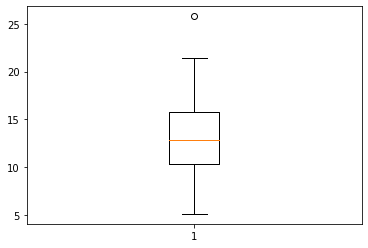

In [16]:
plt.boxplot(Data['suicide'])
plt.show()

In [17]:
Data['suicide_minmax']=minmax_scale(Data['suicide'],copy=True)

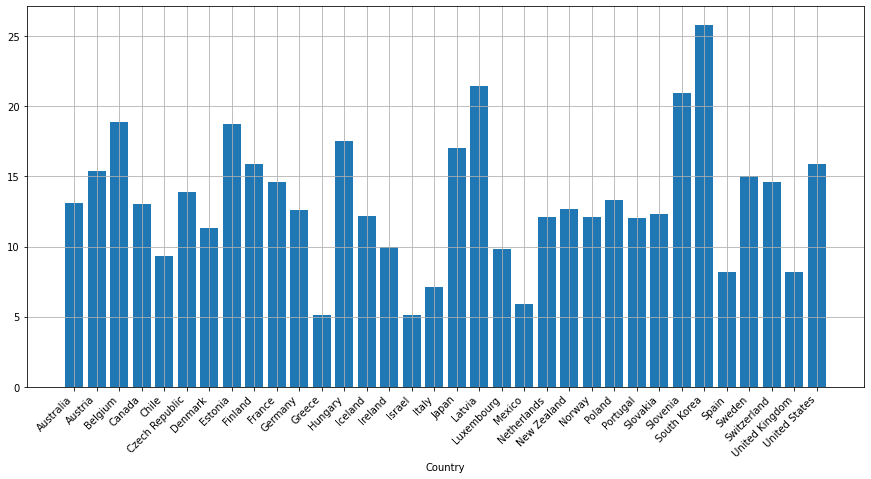

In [2]:
plt.figure(figsize=(15,7))
plt.bar(Data['Entity'],Data['suicide'])
plt.grid(True)
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.show()

In [3]:
def Make_data(dataframe, data):
    dataframe=dataframe.sort_values(by=data)
    dataframe=dataframe.reset_index()
    return dataframe

def Make_plt(dataframe,data):
    #plt.plot(dataframe[data],dataframe['depression_percent'],'o',color='cornflowerblue',label=dataframe)
    sns.lmplot(x=data , y="suicide", height=10,data=dataframe)

def Make_linear(dataframe,data):
    linear=LinearRegression()
    linear.fit(dataframe[data].values.reshape(-1,1),dataframe['suicide'])
    pred=linear.predict(dataframe[data].values.reshape(-1,1))
    plt.plot(dataframe[data],linear.predict(dataframe[data].values.reshape(-1,1)),color='red')

    print('Score : ', linear.score(dataframe[data].values.reshape(-1,1),dataframe['suicide']))
    print('RMSE : ', mean_squared_error(pred, dataframe['suicide'])**0.5)
    print('MSE : ', mean_squared_error(pred, dataframe['suicide']),'\n')
    
    print("기울기 : ",linear.coef_)
    print("절편 : ",linear.intercept_,"\n\n")
    
def Pearson_corr(dataframe,data):
    body=pd.DataFrame({'suicide':dataframe['suicide'],data:dataframe[data]})

    pearson_corr=body.corr(method='pearson')
    print('pearson_corr : {}\n\n'.format(pearson_corr))

# Change rate PIR

Score :  0.001615732143313231
RMSE :  4.619034578852977
MSE :  21.3354804406395 

기울기 :  [0.04793051]
절편 :  12.978128870655084 




<Figure size 1008x1008 with 0 Axes>

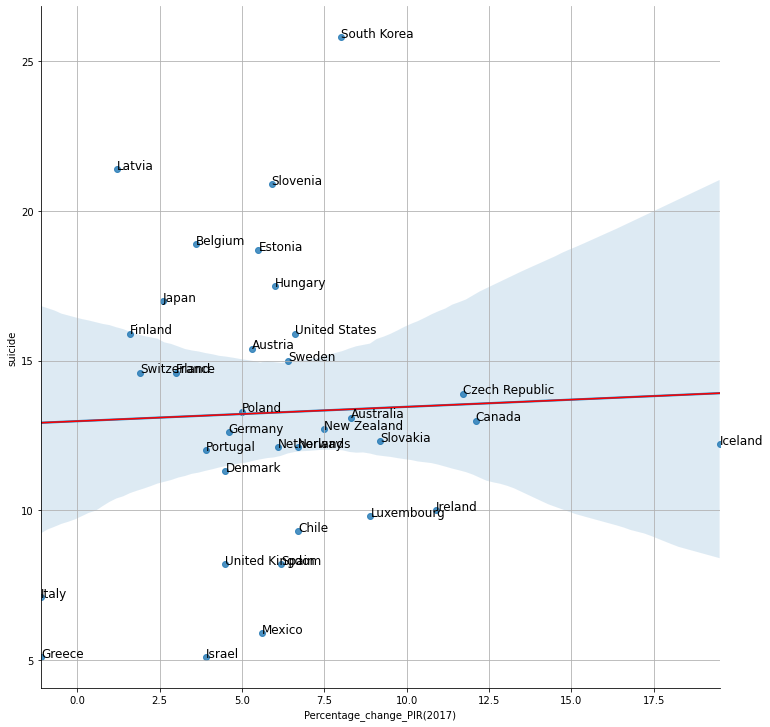

total_PIR_corr : SpearmanrResult(correlation=-0.036541548918029305, pvalue=0.8374388829659596)


In [36]:
plt.figure(figsize=(14,14))

data='Percentage_change_PIR'

PIR_data=Make_data(Data,data)
#Make_name(PIR_data,data)
Make_plt(PIR_data,data)
Make_linear(PIR_data,data)
for i, txt in enumerate(PIR_data['Entity']):
    plt.gca().annotate(txt, (PIR_data[data][i], PIR_data['suicide'][i]),size=12)

plt.xlabel('Percentage_change_PIR(2017)')
plt.ylabel('suicide')
plt.grid(True)
plt.show()

PIR_body=pd.DataFrame({'suicide':PIR_data['suicide'],'PIR':PIR_data[data]})
PIR_corr=stats.spearmanr(PIR_body.PIR,PIR_body.suicide)
print('total_PIR_corr : {}'.format(PIR_corr))

In [19]:
PIR_logis=sm.Logit(PIR_data['suicide_minmax'],PIR_data['Percentage_change_PIR']).fit()
print(PIR_logis.summary())

Optimization terminated successfully.
         Current function value: 0.667136
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         suicide_minmax   No. Observations:                   34
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                 -0.1248
Time:                        13:58:16   Log-Likelihood:                -22.683
converged:                       True   LL-Null:                       -20.165
Covariance Type:            nonrobust   LLR p-value:                       nan
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Percentage_change_PIR    -0.0485      0.050     -0.961      0.336      -0.147       0.

In [33]:
PIR_logis=sm.OLS(PIR_data['suicide_minmax'],PIR_data['Percentage_change_PIR']).fit()
print(PIR_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:         suicide_minmax   R-squared (uncentered):                   0.546
Model:                            OLS   Adj. R-squared (uncentered):              0.532
Method:                 Least Squares   F-statistic:                              39.63
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    4.05e-07
Time:                        14:08:26   Log-Likelihood:                         -7.9192
No. Observations:                  34   AIC:                                      17.84
Df Residuals:                      33   BIC:                                      19.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

# house_price

Score :  0.0033060366157851018
RMSE :  4.615122817373419
MSE :  21.299358619440767 

기울기 :  [0.02262392]
절편 :  10.619025019948124 




<Figure size 1008x1008 with 0 Axes>

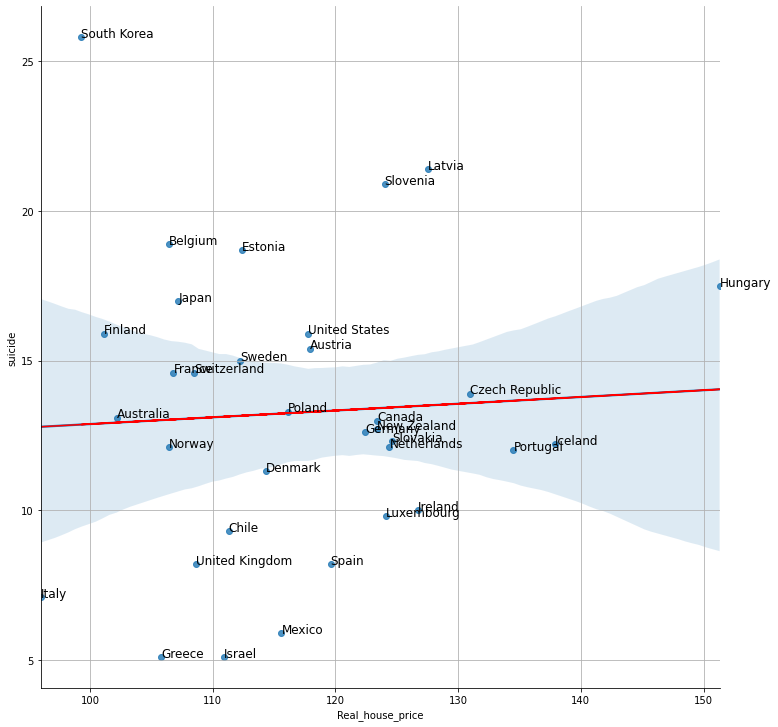

total_Real_house_price_corr : SpearmanrResult(correlation=0.015210579013360656, pvalue=0.9319596991813333)


In [37]:
plt.figure(figsize=(14,14))

data='Real_house_price'

Real_house_price_data=Make_data(Data,data)
#Make_name(PIR_data,data)
Make_plt(Real_house_price_data,data)
Make_linear(PIR_data,data)
for i, txt in enumerate(Real_house_price_data['Entity']):
    plt.gca().annotate(txt, (Real_house_price_data[data][i], Real_house_price_data['suicide'][i]),size=12)

plt.xlabel('Real_house_price')
plt.ylabel('suicide')
plt.grid(True)
plt.show()

Real_house_price_body=pd.DataFrame({'suicide':Real_house_price_data['suicide'],'Real_house_price':Real_house_price_data[data]})
Real_house_price_corr=stats.spearmanr(Real_house_price_body.Real_house_price,Real_house_price_body.suicide)
print('total_Real_house_price_corr : {}'.format(Real_house_price_corr))

In [38]:
Real_house_price_logis=sm.Logit(Real_house_price_data['suicide_minmax'],Real_house_price_data['Real_house_price']).fit()
print(Real_house_price_logis.summary())

Optimization terminated successfully.
         Current function value: 0.654285
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         suicide_minmax   No. Observations:                   34
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                 -0.1032
Time:                        14:12:14   Log-Likelihood:                -22.246
converged:                       True   LL-Null:                       -20.165
Covariance Type:            nonrobust   LLR p-value:                       nan
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Real_house_price    -0.0036      0.003     -1.202      0.229      -0.009       0.002


In [39]:
Real_house_price_logis=sm.OLS(Real_house_price_data['suicide_minmax'],Real_house_price_data['Real_house_price']).fit()
print(Real_house_price_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:         suicide_minmax   R-squared (uncentered):                   0.754
Model:                            OLS   Adj. R-squared (uncentered):              0.747
Method:                 Least Squares   F-statistic:                              101.4
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    1.36e-11
Time:                        14:12:14   Log-Likelihood:                          2.5414
No. Observations:                  34   AIC:                                     -3.083
Df Residuals:                      33   BIC:                                     -1.556
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

# Safety

Score :  0.02996866746660931
RMSE :  4.552974628472364
MSE :  20.729577967513055 

기울기 :  [0.07295622]
절편 :  8.011062382722354 




<Figure size 1008x1008 with 0 Axes>

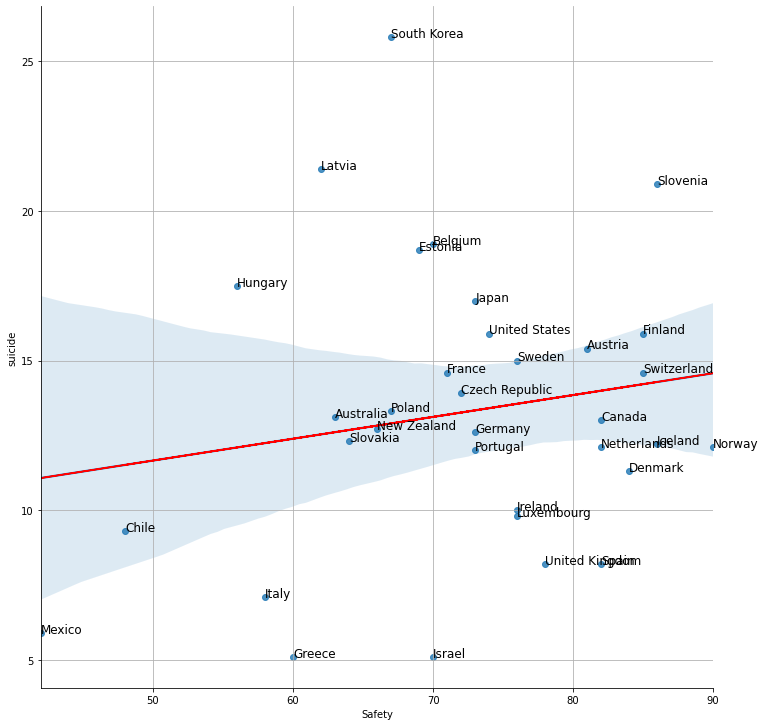

Safety_corr : SpearmanrResult(correlation=0.06542201414466091, pvalue=0.7131729132661004)


In [48]:
plt.figure(figsize=(14,14))

data='Safety'

Safety_data=Make_data(Data,data)
#Make_name(PIR_data,data)
Make_plt(Safety_data,data)
Make_linear(PIR_data,data)
for i, txt in enumerate(Safety_data['Entity']):
    plt.gca().annotate(txt, (Safety_data[data][i], Safety_data['suicide'][i]),size=12)

plt.xlabel('Safety')
plt.ylabel('suicide')
plt.grid(True)
plt.show()

Safety_body=pd.DataFrame({'suicide':Safety_data['suicide'],'Safety':Safety_data[data]})
Safety_corr=stats.spearmanr(Safety_body.Safety,Safety_body.suicide)
print('Safety_corr : {}'.format(Safety_corr))

In [24]:
Safety_logis=sm.Logit(Safety_data['suicide_minmax'],Safety_data['Safety']).fit()
print(Safety_logis.summary())

Optimization terminated successfully.
         Current function value: 0.657824
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         suicide_minmax   No. Observations:                   34
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                 -0.1091
Time:                        13:58:51   Log-Likelihood:                -22.366
converged:                       True   LL-Null:                       -20.165
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Safety        -0.0055      0.005     -1.143      0.253      -0.015       0.004


In [40]:
Safety_logis=sm.OLS(Safety_data['suicide_minmax'],Safety_data['Safety']).fit()
print(Safety_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:         suicide_minmax   R-squared (uncentered):                   0.762
Model:                            OLS   Adj. R-squared (uncentered):              0.755
Method:                 Least Squares   F-statistic:                              105.8
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    7.98e-12
Time:                        14:25:47   Log-Likelihood:                          3.0870
No. Observations:                  34   AIC:                                     -4.174
Df Residuals:                      33   BIC:                                     -2.648
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Elder/Working

Score :  0.05531959010542575
RMSE :  4.4930867487088335
MSE :  20.187828531422912 

기울기 :  [16.79937611]
절편 :  8.625913110616967 




<Figure size 1008x1008 with 0 Axes>

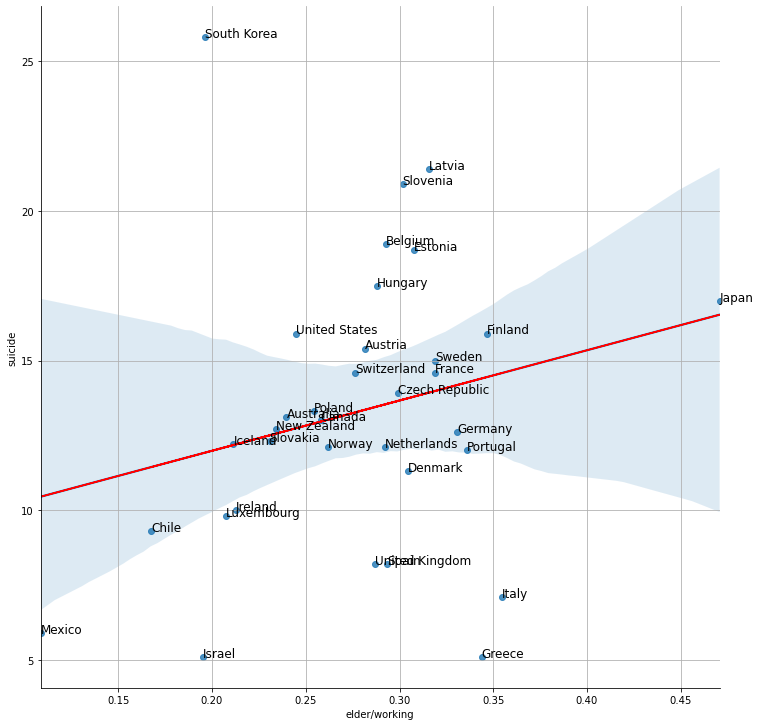

elder/working_corr : SpearmanrResult(correlation=0.23217426226933874, pvalue=0.1864016799239644)


In [49]:
plt.figure(figsize=(14,14))

Data['elder/working']=Data['Elderly_popul']/Data['Working_age_popul']

data='elder/working'

we_data=Make_data(Data,data)
#Make_name(PIR_data,data)
Make_plt(we_data,data)
Make_linear(PIR_data,data)
for i, txt in enumerate(we_data['Entity']):
    plt.gca().annotate(txt, (we_data[data][i], we_data['suicide'][i]),size=12)

plt.xlabel('elder/working')
plt.ylabel('suicide')
plt.grid(True)
plt.show()

we_body=pd.DataFrame({'suicide':we_data['suicide'],'we':we_data[data]})
we_corr=stats.spearmanr(we_body.we,we_body.suicide)
print('elder/working_corr : {}'.format(we_corr))

In [26]:
we_logis=sm.Logit(we_data['suicide_minmax'],we_data['elder/working']).fit()
print(we_logis.summary())

Optimization terminated successfully.
         Current function value: 0.663147
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         suicide_minmax   No. Observations:                   34
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                 -0.1181
Time:                        13:59:09   Log-Likelihood:                -22.547
converged:                       True   LL-Null:                       -20.165
Covariance Type:            nonrobust   LLR p-value:                       nan
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
elder/working    -1.3007      1.235     -1.053      0.292      -3.721       1.120


In [41]:
we_logis=sm.OLS(we_data['suicide_minmax'],we_data['elder/working']).fit()
print(we_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:         suicide_minmax   R-squared (uncentered):                   0.763
Model:                            OLS   Adj. R-squared (uncentered):              0.756
Method:                 Least Squares   F-statistic:                              106.3
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    7.45e-12
Time:                        14:25:57   Log-Likelihood:                          3.1570
No. Observations:                  34   AIC:                                     -4.314
Df Residuals:                      33   BIC:                                     -2.788
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

# Working_hours

Score :  0.02770409600795609
RMSE :  4.558286068159193
MSE :  20.777971879174196 

기울기 :  [-0.00425245]
절편 :  20.333719573303668 




<Figure size 1008x1008 with 0 Axes>

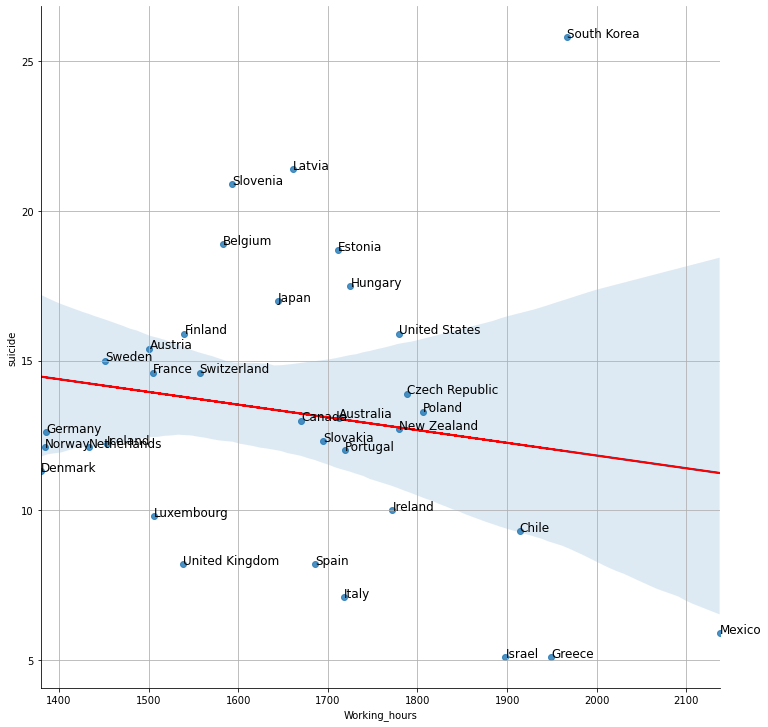

Working_hours_corr : SpearmanrResult(correlation=-0.13061755425435578, pvalue=0.46154817208298604)


In [50]:
plt.figure(figsize=(14,14))

data='Working_hours'

Working_hours_data=Make_data(Data,data)
#Make_name(PIR_data,data)
Make_plt(Working_hours_data,data)
Make_linear(PIR_data,data)
for i, txt in enumerate(Working_hours_data['Entity']):
    plt.gca().annotate(txt, (Working_hours_data[data][i], Working_hours_data['suicide'][i]),size=12)

plt.xlabel('Working_hours')
plt.ylabel('suicide')
plt.grid(True)
plt.show()

Working_hours_body=pd.DataFrame({'suicide':Working_hours_data['suicide'],'Working_hours':Working_hours_data[data]})
Working_hours_corr=stats.spearmanr(Working_hours_body.Working_hours,Working_hours_body.suicide)
print('Working_hours_corr : {}'.format(Working_hours_corr))

In [28]:
Working_hours_logis=sm.Logit(Working_hours_data['suicide_minmax'],Working_hours_data['Working_hours']).fit()
print(Working_hours_logis.summary())

Optimization terminated successfully.
         Current function value: 0.651724
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:         suicide_minmax   No. Observations:                   34
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                -0.09886
Time:                        13:59:30   Log-Likelihood:                -22.159
converged:                       True   LL-Null:                       -20.165
Covariance Type:            nonrobust   LLR p-value:                       nan
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Working_hours    -0.0003      0.000     -1.262      0.207      -0.001       0.000


In [42]:
Working_hours_logis=sm.OLS(Working_hours_data['suicide_minmax'],Working_hours_data['Working_hours']).fit()
print(Working_hours_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:         suicide_minmax   R-squared (uncentered):                   0.733
Model:                            OLS   Adj. R-squared (uncentered):              0.725
Method:                 Least Squares   F-statistic:                              90.59
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    5.50e-11
Time:                        14:26:13   Log-Likelihood:                          1.1167
No. Observations:                  34   AIC:                                    -0.2334
Df Residuals:                      33   BIC:                                      1.293
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

# Employ_rate

Score :  0.09671343889841921
RMSE :  4.39354545038951
MSE :  19.303241624638364 

기울기 :  [0.23738948]
절편 :  -3.6749273813777688 




<Figure size 1008x1008 with 0 Axes>

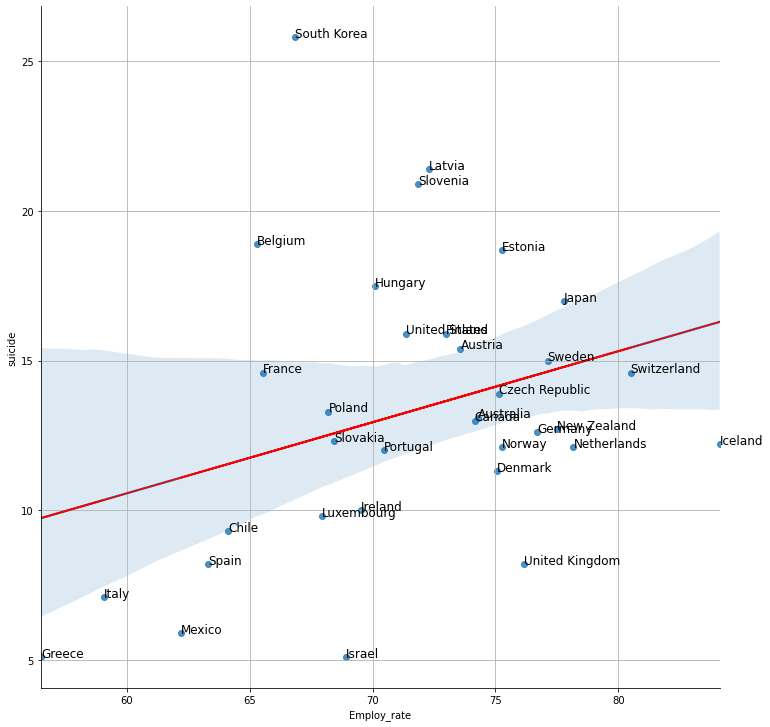

Employ_rate_corr : SpearmanrResult(correlation=0.27201162995392175, pvalue=0.11964401989617515)


In [51]:
plt.figure(figsize=(14,14))

data='Employ_rate'

Employ_rate_data=Make_data(Data,data)
#Make_name(PIR_data,data)
Make_plt(Employ_rate_data,data)
Make_linear(PIR_data,data)
for i, txt in enumerate(Employ_rate_data['Entity']):
    plt.gca().annotate(txt, (Employ_rate_data[data][i],Employ_rate_data['suicide'][i]),size=12)

plt.xlabel('Employ_rate')
plt.ylabel('suicide')
plt.grid(True)
plt.show()

Employ_rate_body=pd.DataFrame({'suicide':Employ_rate_data['suicide'],'Employ_rate':Employ_rate_data[data]})
Employ_rate_corr=stats.spearmanr(Employ_rate_body.Employ_rate,Employ_rate_body.suicide)
print('Employ_rate_corr : {}'.format(Employ_rate_corr))

In [30]:
Employ_rate_logis=sm.Logit(Employ_rate_data['suicide_minmax'],Employ_rate_data['Employ_rate']).fit()
print(Employ_rate_logis.summary())

Optimization terminated successfully.
         Current function value: 0.657354
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         suicide_minmax   No. Observations:                   34
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                 -0.1084
Time:                        13:59:47   Log-Likelihood:                -22.350
converged:                       True   LL-Null:                       -20.165
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Employ_rate    -0.0056      0.005     -1.152      0.249      -0.015       0.004


In [43]:
Employ_rate_logis=sm.OLS(Employ_rate_data['suicide_minmax'],Employ_rate_data['Employ_rate']).fit()
print(Employ_rate_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:         suicide_minmax   R-squared (uncentered):                   0.774
Model:                            OLS   Adj. R-squared (uncentered):              0.768
Method:                 Least Squares   F-statistic:                              113.2
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    3.34e-12
Time:                        14:26:23   Log-Likelihood:                          3.9777
No. Observations:                  34   AIC:                                     -5.955
Df Residuals:                      33   BIC:                                     -4.429
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

# Gini_coff

Score :  0.07644154033469042
RMSE :  4.442572708724945
MSE :  19.73645227230769 

기울기 :  [-24.53804068]
절편 :  20.893817064332335 




<Figure size 1008x1008 with 0 Axes>

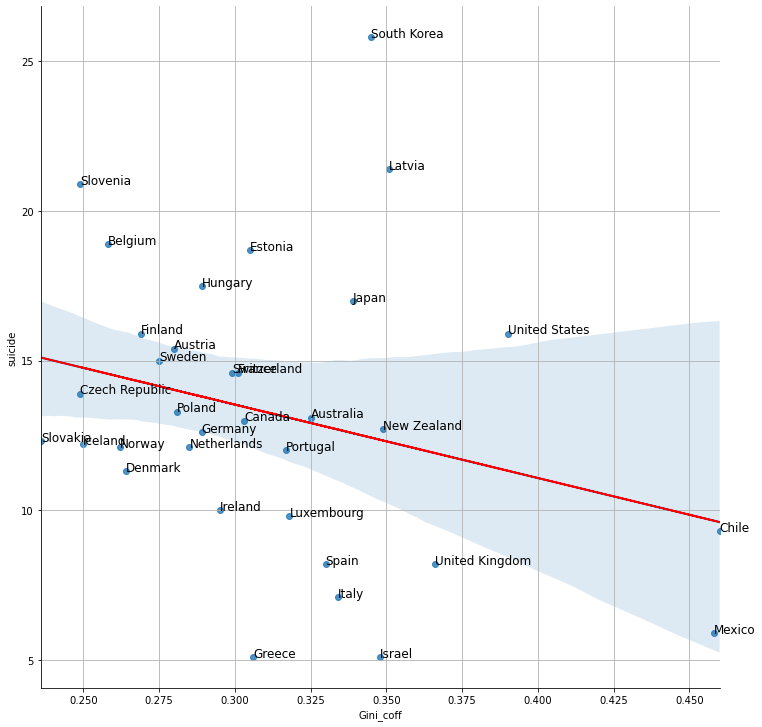

Gini_coff_corr : SpearmanrResult(correlation=-0.2597263692834147, pvalue=0.1379689168074004)


In [45]:
plt.figure(figsize=(14,14))

data='Gini_coff'

Gini_coff_data=Make_data(Data,data)
#Make_name(PIR_data,data)
Make_plt(Gini_coff_data,data)
Make_linear(PIR_data,data)
for i, txt in enumerate(Gini_coff_data['Entity']):
    plt.gca().annotate(txt, (Gini_coff_data[data][i],Gini_coff_data['suicide'][i]),size=12)

plt.xlabel('Gini_coff')
plt.ylabel('suicide')
plt.grid(True)
plt.show()

Gini_coff_body=pd.DataFrame({'suicide':Gini_coff_data['suicide'],'Gini_coff':Gini_coff_data[data]})
Gini_coff_corr=stats.spearmanr(Gini_coff_body.Gini_coff,Gini_coff_body.suicide)
print('Gini_coff_corr : {}'.format(Gini_coff_corr))

In [32]:
Gini_coff_logis=sm.Logit(Gini_coff_data['suicide_minmax'],Gini_coff_data['Gini_coff']).fit()
print(Gini_coff_logis.summary())

Optimization terminated successfully.
         Current function value: 0.647637
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         suicide_minmax   No. Observations:                   34
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                -0.09197
Time:                        14:00:03   Log-Likelihood:                -22.020
converged:                       True   LL-Null:                       -20.165
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Gini_coff     -1.4814      1.121     -1.321      0.186      -3.679       0.716


In [44]:
Gini_coff_logis=sm.OLS(Gini_coff_data['suicide_minmax'],Gini_coff_data['Gini_coff']).fit()
print(Gini_coff_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:         suicide_minmax   R-squared (uncentered):                   0.698
Model:                            OLS   Adj. R-squared (uncentered):              0.689
Method:                 Least Squares   F-statistic:                              76.40
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    4.21e-10
Time:                        14:26:36   Log-Likelihood:                        -0.95725
No. Observations:                  34   AIC:                                      3.915
Df Residuals:                      33   BIC:                                      5.441
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [54]:
index_list=['PIR','House_price','Safety','elder/working','Working_housrs','Employ_rate','Gini_coff']
total_corr=['-0.036541548918029305','0.015210579013360656','0.06542201414466091','0.23217426226933874','-0.13061755425435578','0.27201162995392175','-0.2597263692834147']

total_pvalue=['0.8374388829659596','0.9319596991813333','0.7131729132661004','0.1864016799239644','0.46154817208298604','0.11964401989617515','0.1379689168074004']
bar_dict={'list':index_list,'total_corr':total_corr,'total_p':total_pvalue}

In [55]:
bar=pd.DataFrame(bar_dict)
bar

,list,total_corr,total_p
0,PIR,-0.036541548918029305,0.8374388829659596
1,House_price,0.015210579013360656,0.9319596991813333
2,Safety,0.06542201414466091,0.7131729132661004
3,elder/working,0.23217426226933874,0.1864016799239644
4,Working_housrs,-0.13061755425435578,0.46154817208298604
5,Employ_rate,0.27201162995392175,0.11964401989617515
6,Gini_coff,-0.2597263692834147,0.1379689168074004


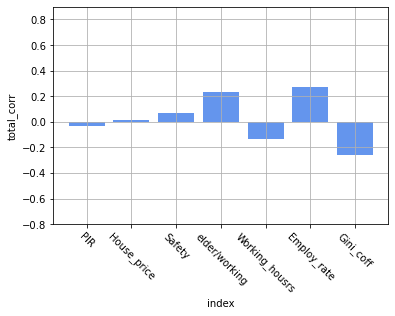

In [56]:
for i in range(len(bar)):
    plt.bar(bar['list'][i],float(bar['total_corr'][i]),color='cornflowerblue')
plt.grid(True)
plt.xlabel('index')
plt.ylabel('total_corr')
plt.ylim([-0.8,0.9])
plt.xticks(rotation = - 45)
plt.show()

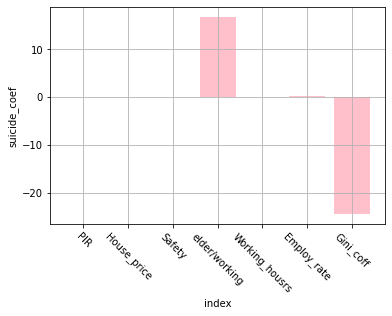

In [57]:
suicide_coef=['0.04793051','0.02262392','0.07295622','16.79937611','-0.00425245','0.23738948','-24.53804068']
suicide_dict={'list':index_list, 'suicide_coef':suicide_coef}
suicide=pd.DataFrame(suicide_dict)

for i in range(len(suicide)):
    plt.bar(suicide['list'][i],float(suicide['suicide_coef'][i]),color='pink')
plt.grid(True)
plt.xlabel('index')
plt.ylabel('suicide_coef')
#plt.ylim([0,3])
plt.xticks(rotation = - 45)
plt.show()